In [1]:
import pandas as pd
import geopandas as gpd
import altair as alt
from altair.expr import datum
import json
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
dhs_info = '../data/dhs_info_for_climate_extraction_26sept2018.csv'
dhs_df = pd.read_csv(dhs_info, sep=',')
dhs_data = dhs_df.loc[:, ['longnum', 'latnum', 'dhscc']]

geo_info = '../data/shapefiles/Africa_SHP/sub_saharan_africa.shp'
geo_df = gpd.read_file(geo_info)

# Goes through the dataset, grouping each country's entry
country_data = list()
for c in geo_df.dhscc.unique():
    curr_country = dhs_df[dhs_df.dhscc == c]
    country_data.append(curr_country)

In [3]:
def plot_country(country_data, country_geo):
    country_json = json.loads(country_geo.to_json())
    country_shape = alt.Data(values=country_json)
    
    geo_chart = alt.Chart(country_shape).mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).properties(
        width=160,
        height=160
    )
    
    country_plot = alt.Chart(country_data).mark_point(
        size=1
    ).encode(
        alt.X('longnum',
             scale=alt.Scale(zero=False)
        ),
        alt.Y('latnum',
             scale=alt.Scale(zero=False)
        ),
        color='dhscc:N'
    )
    
    return geo_chart + country_plot

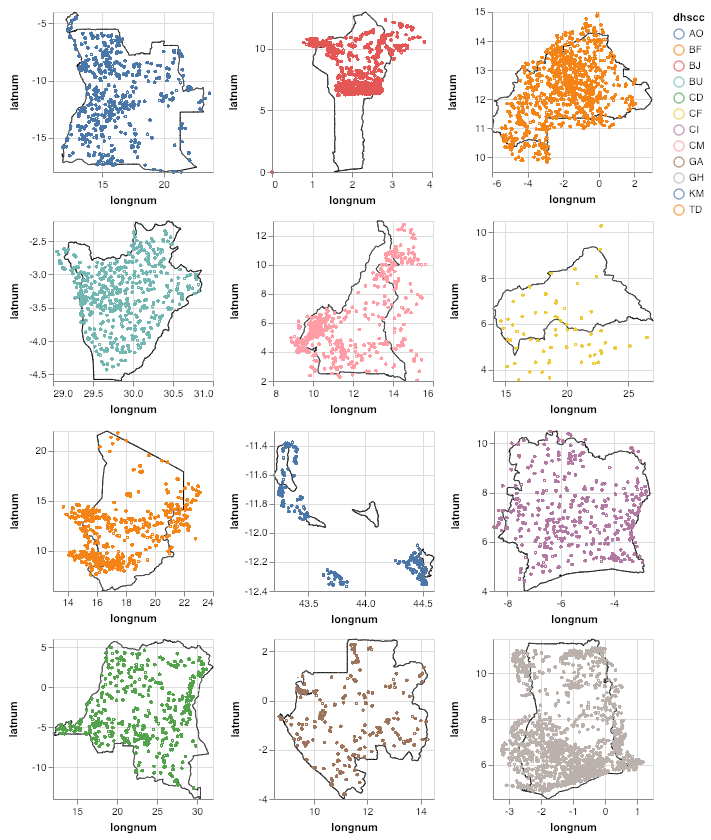

In [4]:
# Create the first layer
temp = alt.hconcat(plot_country(country_data[0], geo_df[geo_df.dhscc == country_data[0].dhscc.unique()[0]]),
                   plot_country(country_data[1], geo_df[geo_df.dhscc == country_data[1].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[2], geo_df[geo_df.dhscc == country_data[2].dhscc.unique()[0]]))
plot = row

# Create the second layer
temp = alt.hconcat(plot_country(country_data[3], geo_df[geo_df.dhscc == country_data[3].dhscc.unique()[0]]),
                   plot_country(country_data[4], geo_df[geo_df.dhscc == country_data[4].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[5], geo_df[geo_df.dhscc == country_data[5].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

# Create the third layer
temp = alt.hconcat(plot_country(country_data[6], geo_df[geo_df.dhscc == country_data[6].dhscc.unique()[0]]),
                   plot_country(country_data[7], geo_df[geo_df.dhscc == country_data[7].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[8], geo_df[geo_df.dhscc == country_data[8].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

temp = alt.hconcat(plot_country(country_data[9], geo_df[geo_df.dhscc == country_data[9].dhscc.unique()[0]]),
                   plot_country(country_data[10], geo_df[geo_df.dhscc == country_data[10].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[11], geo_df[geo_df.dhscc == country_data[11].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

plot